### IMPORT

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from pygam import LinearGAM, s, f
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 깨지지않게 해줌

# RF

In [3]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

### OLS 변수들

In [4]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [5]:
# OLS
df = df[['자치구','계약일','층',"Fed기준금리",'부동산거래량','회사채3년(평균)','건물연식','금값종가','LTV','물건금액(만원)']]

In [6]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.022760458976259
Test set RMSE: 0.1508656984746997
Test set r2_score : 0.6344153052676875


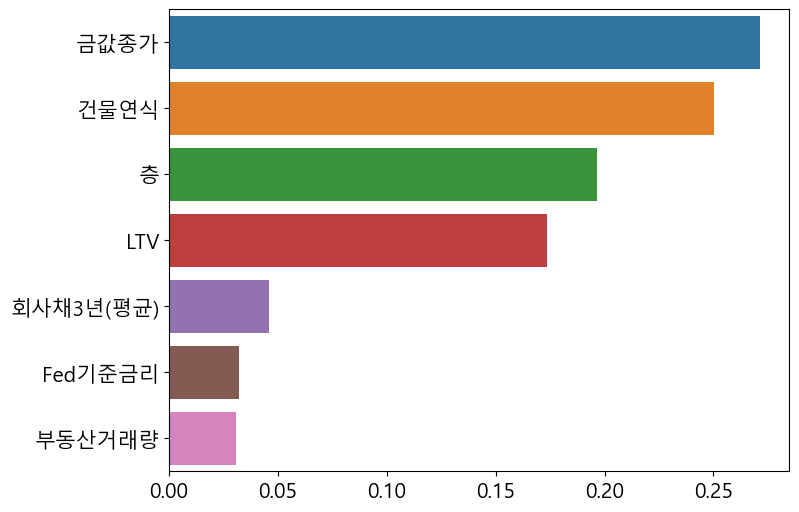

In [7]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [8]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [9]:
# R_OLS
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)', '건물연식', '금값종가', 'LTV','물건금액(만원)']]

In [10]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.02276045897625901
Test set RMSE: 0.15086569847469972
Test set r2_score : 0.6344153052676875


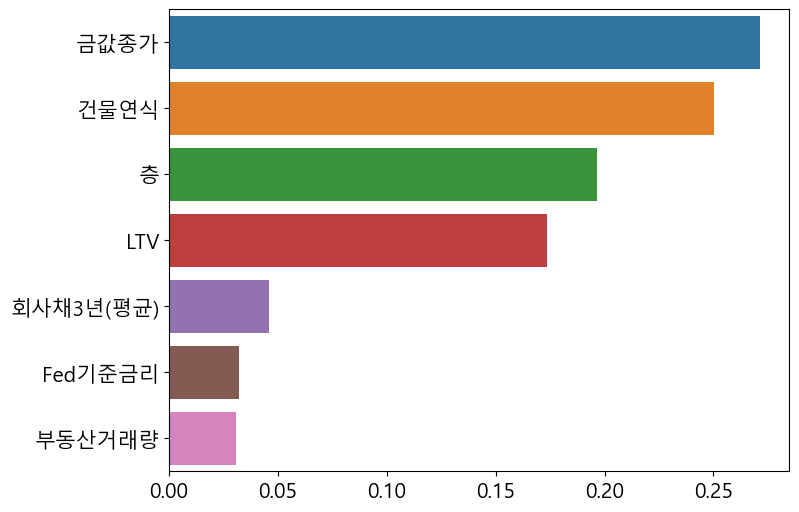

In [11]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB

In [12]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [13]:
df = df[['자치구','계약일','층',"Fed기준금리",'부동산거래량','회사채3년(평균)','건물연식','금값종가','LTV','물건금액(만원)']]

In [14]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# xgb 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.042138401951511105
Test set RMSE: 0.20527640378648274
Test set r2_score : 0.32316150434314683


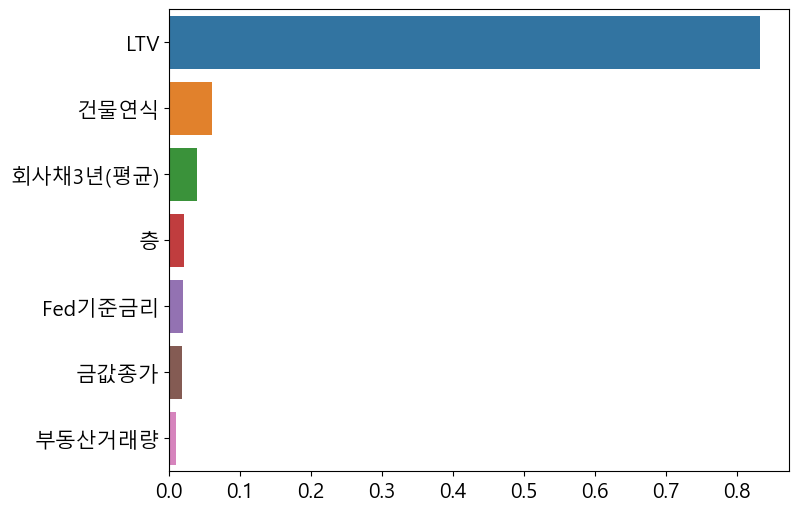

In [15]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [16]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


In [17]:
# R_OLS
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)', '건물연식', '금값종가', 'LTV','물건금액(만원)']]

In [18]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# xgb 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.042138401951511105
Test set RMSE: 0.20527640378648274
Test set r2_score : 0.32316150434314683


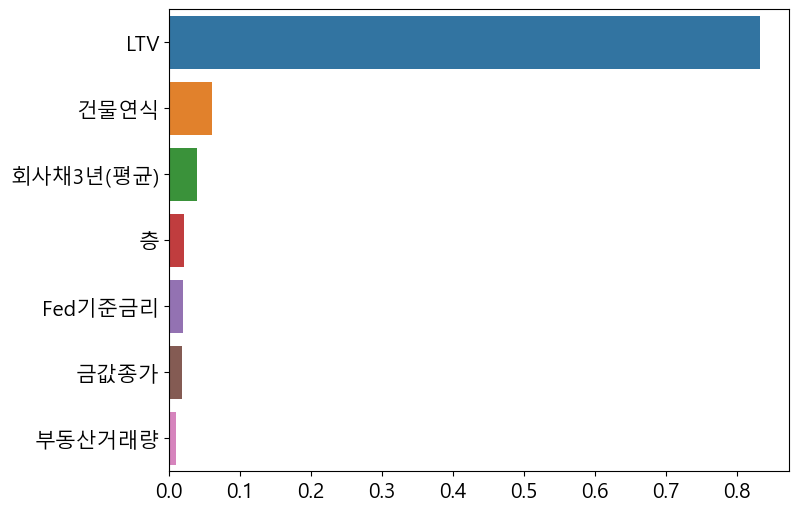

In [19]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DT

In [20]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
1,관악구,2016-01-01,105.36,1,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,23,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,37300
2,동작구,2016-01-01,109.70,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,13,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,49000
3,은평구,2016-01-01,134.87,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,74000
4,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100076,성동구,2022-12-30,148.23,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,36,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,180000
100077,용산구,2022-12-30,114.60,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,24,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,215000
100078,강남구,2022-12-30,144.20,8,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,44,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,430000
100079,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000


In [21]:
df = df[['자치구','계약일','층',"Fed기준금리",'부동산거래량','회사채3년(평균)','건물연식','금값종가','LTV','물건금액(만원)']]

In [22]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 결정 나무 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.03341298273412073
Test set RMSE: 0.18279218455426569
Test set r2_score : 0.46331156565467024


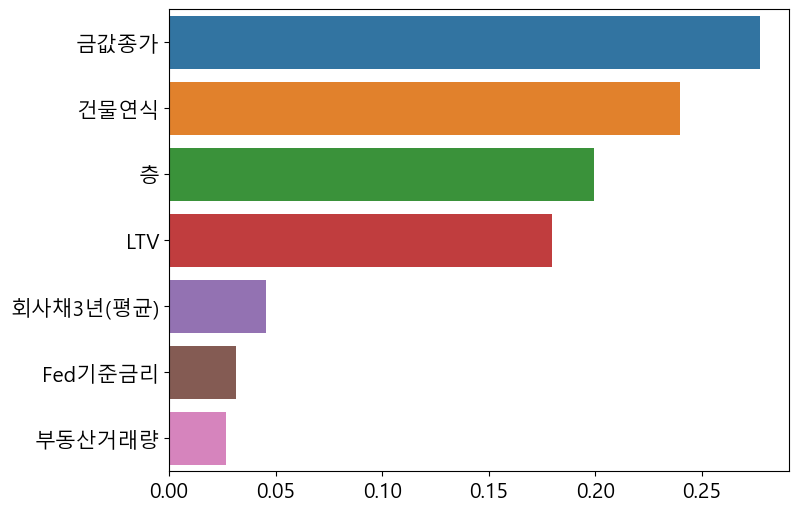

In [23]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [24]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [25]:
# R_OLS
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)', '건물연식', '금값종가', 'LTV','물건금액(만원)']]

In [26]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 결정 나무 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.03341298273412073
Test set RMSE: 0.18279218455426569
Test set r2_score : 0.46331156565467024


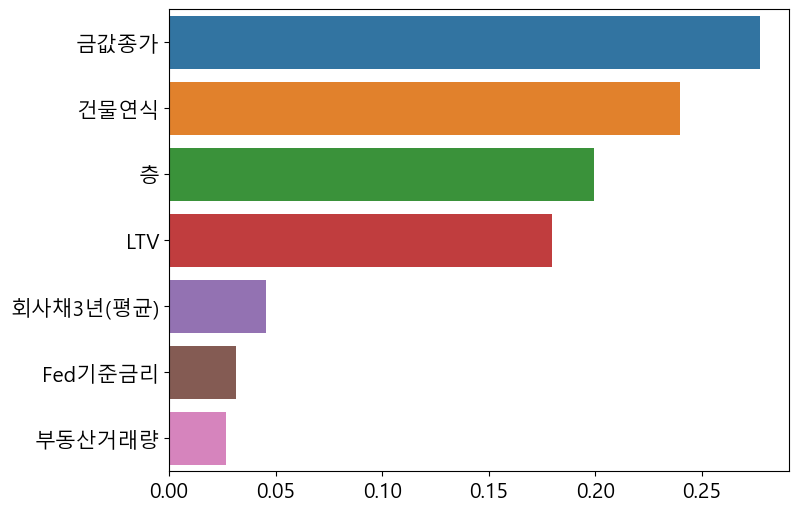

In [27]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# RB(HR)

https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.linear_model.huberregressor

로버스트 회귀모델 중 HuberRegressor사용


HuberRegressor는 로버스트 회귀를 위해 설계된 모델로, 이상치에 강건한 추정을 제공하는 것이 주요 목적입니다. 따라서, HuberRegressor를 사용할 때 주로 모델의 성능 평가나 변수의 중요도를 평가하기 위해 다른 지표나 방법을 활용해야 합니다.

예를 들어, HuberRegressor 모델의 변수 중요도를 평가하려면 다음과 같은 방법을 고려할 수 있습니다:

계수(Coefficients) 확인: HuberRegressor 모델의 coef_ 속성을 확인하여 각 독립 변수의 계수 값을 확인할 수 있습니다. 이는 변수가 종속 변수에 얼마나 큰 영향을 미치는지를 나타냅니다.

변수 제거 기법: HuberRegressor 모델에서 가장 중요한 변수를 확인하기 위해 변수를 하나씩 제거하고 모델의 성능 변화를 관찰할 수 있습니다. 성능 변화가 큰 변수는 중요한 변수로 간주할 수 있습니다.

Permutation Importance: permutation importance는 변수를 무작위로 섞어 모델의 성능 변화를 평가하는 방법입니다. 이를 통해 변수의 중요도를 추정할 수 있습니다. scikit-learn의 permutation_importance 함수를 사용하여 수행할 수 있습니다.

이러한 방법들을 활용하여 HuberRegressor 모델의 변수 중요도를 평가할 수 있습니다. 하지만 주의할 점은 HuberRegressor가 다른 회귀 모델보다 변수 중요도를 명시적으로 제공하지 않는다는 점입니다.

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [29]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [30]:
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)',  '건물연식', 'EPU', 'LTV','물건금액(만원)']]

In [31]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = HuberRegressor()

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.049413117541196476
Test set RMSE: 0.22229061505424938
Test set r2_score : 0.20631304004400342


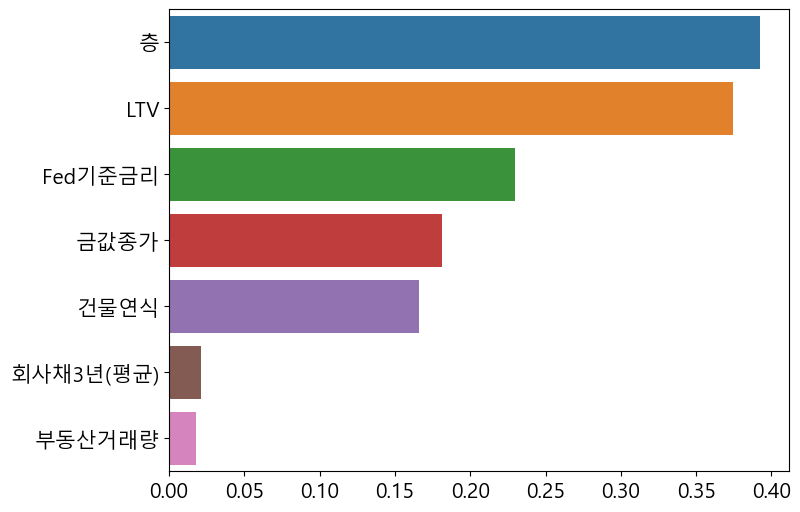

In [32]:
# test_df
importances = np.abs(model.coef_)
# 상위 20개 변수 추출
top_features = pd.Series(importances, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [33]:
df = pd.read_csv('./DF_SPLIT/전용면적_85초과.csv')

In [34]:
# R_OLS
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)', '건물연식', '금값종가', 'LTV','물건금액(만원)']]

In [35]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = HuberRegressor()

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.049413117541196476
Test set RMSE: 0.22229061505424938
Test set r2_score : 0.20631304004400342


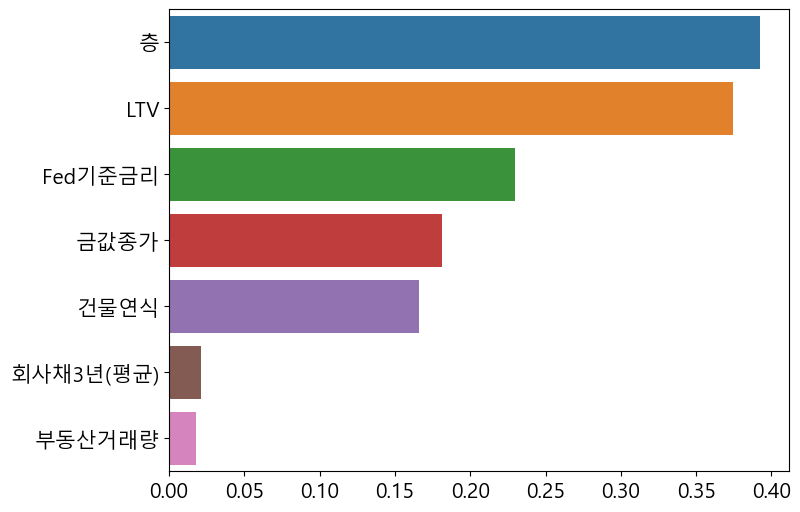

In [36]:
# test_df
importances = np.abs(model.coef_)
# 상위 20개 변수 추출
top_features = pd.Series(importances, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

In [37]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

AttributeError: 'HuberRegressor' object has no attribute 'feature_importances_'

## GAM

In [ ]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')

In [ ]:
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)',  '건물연식', 'EPU', 'LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = LinearGAM(s(0))

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.12368364103307895
Test set RMSE: 0.35168685081060247
Test set r2_score : -0.986640348405271


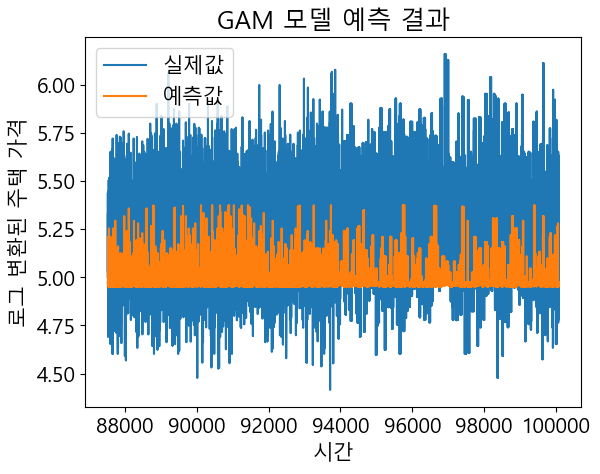

In [ ]:
# 예측 결과 시각화
plt.plot(y_test.index, y_test_scaled, label='실제값')
plt.plot(y_test.index, test_predictions, label='예측값')
plt.xlabel('시간')
plt.ylabel('로그 변환된 주택 가격')
plt.title('GAM 모델 예측 결과')
plt.legend()
plt.show()

### R_OLS 변수들

In [ ]:
df = pd.read_csv('./DF_SPLIT/전용면적_85이하.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','층', 'Fed기준금리', '회사채3년(평균)', '건물연식', 'GDP대비가계부채비율', 'EPU', 'LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = LinearGAM(s(0))

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.12368364103307895
Test set RMSE: 0.35168685081060247
Test set r2_score : -0.986640348405271


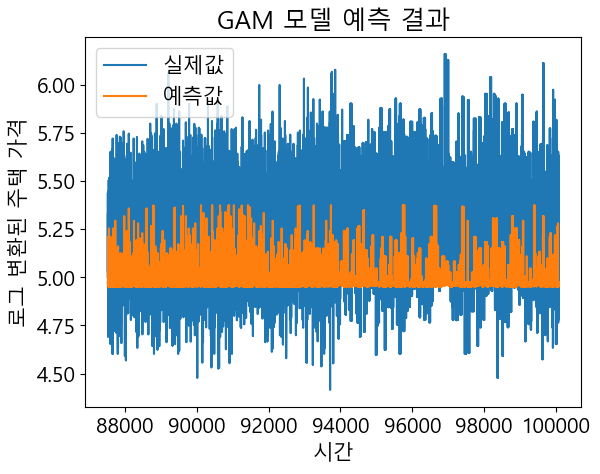

In [ ]:
# 예측 결과 시각화
plt.plot(y_test.index, y_test_scaled, label='실제값')
plt.plot(y_test.index, test_predictions, label='예측값')
plt.xlabel('시간')
plt.ylabel('로그 변환된 주택 가격')
plt.title('GAM 모델 예측 결과')
plt.legend()
plt.show()